# 1. Análisis de atributos y exploración de la base de datos

Como en cualquier Jupyter Notebook trabajo con anterioridad, lo primero que haremos será importar las librerías que usaremos en todo nuestro proyecto:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio import plotly
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

***
Ahora importaremos el dataset guardado en 'input/dataset.ext' y lo guardamos en la variable 'dataset'.

Una vez lo hayamos guardado en una variable y con el objetivo de hacernos una primera idea de los diferentes atributos de nuestro dataset, usaremos la función *head(nFilas)*. Esta función nos ayudará a visualizar el primer número de filas del dataset y tomará la primera de todas ellas como la cabecera de atributos.

Aun así, debo decir que lo mejor para realmente hacerte a la idea de con qué estás trabajando es directamente abrir el fichero donde esté contenido el dataset y escudriñarlo de arriba a abajo. 
Pese a esto, pero, hay cosas como posibles valores no respondidos, celdas incompletas, o celdas que no encajen con los valores que deberían, que no podrás localizar. Esto lo detectaremos más adelante, pues tenemos muchas formas muy potentes para detectar estos casos.

In [2]:
dataset =  pd.read_csv('../../input/pokemon.csv')
dataset.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


***

## 1.1. Análisis de los atributos en profundidad.

Ya hemos visto los atributos, ahora, procedo a explicaros qué significa cada uno y qué implicaciones tienen. Analizemos los atributos!


El dataset tiene 721 Pokémon. Cada Pokémon es una criatura fantástica existente en el mundo Pokémon, perteneciente a la franquicia The Pokémon Company©. 

Estas criaturas serían en su mundo lo que para nosotros son los animales. Con la diferencia de que cada una de estas puede tener diferentes atributos físicos y mágicos. Ahora lo explicaré con más profundidad por orden de atributos:

- '#': ID de cada Pokémon.

- Name: Nombre de cada Pokémon.

- Type 1: Cada Pokémon tiene un tipo, este tipo determinará sus debilidades o resistencias a los aatques de cierto tipo.

- Type 2: Algunos Pokémon tienen dos tipos diferentes. Las debilidades y resistencias se acumulan.

- Total: La suma de todos los campos de las estadísticas de un Pokémon.

- HP: En inglés 'Health Points', determina cuanta vida tiene un Pokémon y cuantos golpes aguanta.

- Attack: El modificador base que afectará al cálculo de daño de los ataques físicos.

- Defense: La resistencia base al daño de los ataques físicos.

- SP Atk: En inglés 'Special Attack', modificador base que afectará al cálculo de daño de los ataques especiales.

- SP Def: En inglés 'Special Defense', la resistencia base al daño de los ataques especiales.

- Speed: Determina, según quien la tiene mayor, qué Pokémon ataca antes en un combate.

- Generation: Cada entrega de los juegos para consola de Pokémon cuenta como una nueva generación. Empezamos por la 1ª que fue la del 1996 y llegamos hasta día de hoy.

- Legendary: En el mundo Pokémon hay algunas de estas criaturas que tienen el sobrenombre de Pokémon Legendarios. Esto proviene del hecho de que los calificados con ese pseudónimo tienen habilidades extraordinarias y fuera de lo común en su mundo. Pueden ser habilidades muy poderosas, o una dificultad de ser vistas gigantesca, o también que tengan unas estadísticas más elevadas de los común.

***

## 1.2. Inicio del tratamiento de datos.

Ahora ya sabemos y tenemos una idea muy clara del tipo de atributos con los que estamos tratando. Ahora vamos pues a la 'chicha' de la cuestión y nos pondremos manos a la obra.

Hace un rato os había comentado que debíamos realizar antes de nada una inspección visual de los datos. Pero también había comentado que, a veces, nos podemos encontrar algunos datos que no están en la base de datos. No porque hayan desaparecido por arte de magia o por alguna clase de error, sino porque en ocasiones hay algunos atributos que simplemente no se contestan. 

Vamos pues, a comprobar si es nuestro caso. Y, en caso de ser cierto, actuar.


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Aquí ocurre algo curioso, y es que tenemos 800 entradas, pero sin embargo nos fijamos en que en el '#3' que es el Type2, hay unas casi 400 entradas nulas. Esto por qué puede ser?

Pues bien, esto es algo que si desconoces acerca de la saga Pokémon puedas pasar por alto o darle más importancia de la que realmente tiene. Pero os aseguro que si conocéis del tema no tiene mayor importancia. Así que os cuento.

En el mundo Pokémon cada una de estas criaturas tienen un tipo que se supone que les representa (si viven en el agua es tipo 'agua', en la montaña serán de 'roca', etc). Bien, lo que aquí ocurre es que algunas de estas criaturas, que no todas, pueden llegar a tener hasta dos tipos diferentes. Esto a modo de representarlas de forma más fiel a la realidad. Por ejemplo, un Pokémon que represente a un ave fénix será representado con los tipos 'fuego y volador', ambos a la vez. 

Esta es una característica que en el caso de desconocer la saga podríamos pasar por alto y atribuirla a un error. Por suerte, yo soy un gran fan de la misma.

Aun así sustituiremos todos los valores no contestados como una etiqueta 'Blank'. Así por lo menos los tendremos controlados.

In [4]:
dataset = dataset.fillna(value={'Type 2':'Blank'})

dataset.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Blank,309,39,52,43,60,50,65,1,False


Antes nuestro Charmander, era de los tipos 'Fuego y NaN'. Ahora es de los tipos 'Fuego y Blank'. 'Blank' sigue sin ser un tipo existente, pero por lo menos ahora lo tenemos controlado.

***

## 1.3. Análisis de distribuciones de los atributos.

En este apartado realizaremos diferentes visualizaciones a traves de *plots* para ver qué distribuciones siguen nuestros atributos del dataset.

### 1.3.1. Distribución de la *HP*.

In [5]:
fig = ff.create_distplot([dataset.HP],['HP'],bin_size=5)
iplot(fig, filename='HP Distplot')

### 1.3.2. Distribución del *Attack*.

In [6]:
fig1 = ff.create_distplot([dataset.Attack],['Attack'],bin_size=5)
iplot(fig1, filename='Attack Distplot')

### 1.3.3. Distribución de la *Defense*.

In [7]:
fig2 = ff.create_distplot([dataset.Defense],['Defense'],bin_size=5)
iplot(fig1, filename='Defense Distplot')

Podemos realizar esto para todos y cada uno de los atributos, pero nos ha servido visualizar las distribuciones de cada estadística base del Pokémon. 

Recordemos que lo que estamos visualizando es cuantos Pokémon tienen p.e. 255 de Ataque, y así con todos los rangos posibles de la estadística Ataque.

***

### 1.3.4. Distribuciones de todas las estadísticas básicas. 
Compararemos ahora las distribuciones de TODAS las estadísticas básicas de los Pokémon, a la vez.

#### 1.3.4.1. En histograma.

In [8]:
hist_data = [dataset['HP'],dataset['Attack'],dataset['Defense'],dataset['Sp. Atk'],dataset['Sp. Def'],dataset['Speed']]
group_labels = list(dataset.iloc[:,5:11].columns)

fig4 = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig4, filename='Full stats Distplot')

Ahora las observamos todas juntas. Tal y como habíamos ido haciendo hasta el momento de obtener una a una la distribución de cada estadística básica, ahora podemos observarlas todas juntas. De aquí podemos ir sacando conclusiones muy interesantes.

Podemos observar de la figura de arriba que pese a que cada estadística básica tiene más tendencia, o se concentra más, en unos valores que en otros y que algunas tienen unos outliers mayores que las otras, hay algo extremadamente útil que podemos sacar en claro: Y es que siguen una distribución Gaussiana. 

Obviamente y como en todos lados, tenemos outliers, y ya lidiaremos con ellos en su momento. Pero por ahora es una muy buena noticia el hecho de que las estadísticas entre sí tengan una distribución Gaussiana.

***

#### 1.3.4.1. En gráfico de violín.

In [9]:
data = []
for i in range(5,11):
    trace = {
            "type": 'violin',
            "x": max(dataset.iloc[:,i]),
            "y": dataset.iloc[:,i],
            "name": list(dataset.columns)[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)
        
fig = {
    "data": data,
    "layout" : {
        "title": "Gráfico de violin de cada estadística básica",
        "yaxis": {
            "zeroline": False,
        }
    }
}

iplot(fig, filename='violin', validate = False)

Esta gráfica de violín no deja de ser otra forma también muy interesante de mostrar la distribución de todos los datos. 

Depende de la persona y de cómo te sea más sencillo visualizar los datos te irá mejor representarlas en un gráfico de violín o en un histograma como habíamos hecho anteriormente. 

Si me preguntáis a mi, en mi experiencia en este tema (que es poca porque estamos aún aprendiendo y acabamos de empezar como quien dice) mientras que el histograma es mucho más sencillo de cara a comparar las distintas distribuciones de cada estadística, el diagrama de violín nos muestra mucho más claramente los outliers de cada una de estas. 

Podemos observar lo que comentamos ahora mismo, pues en la estadística de HP sin ir más lejos podemos ver dos outliers muy bien definidos, uno en '(HP, 1)' y el otro en '(HP, 255)'.

***
#### 1.3.4.1. En diagrama de caja.

Pero si hay un método que definitivamente es el rey de mostrar outliers, ese es el diagrama de caja. Y ahora mostraremos nuestras estadísticas básicas en un diagrama de este tipo.

In [10]:
trace0 = go.Box(y=dataset["HP"],name="HP")
trace1 = go.Box(y=dataset["Attack"],name="Attack")
trace2 = go.Box(y=dataset["Defense"],name="Defense")
trace3 = go.Box(y=dataset["Sp. Atk"],name="Sp. Atk")
trace4 = go.Box(y=dataset["Sp. Def"],name="Sp. Def")
trace5 = go.Box(y=dataset["Speed"],name="Speed")
data = [trace0, trace1, trace2,trace3, trace4, trace5]
iplot(data)

Puede parecer muy parecido a un diagrama de violín, pues en esencia, lo es. Pero desde luego aquí vemos de una forma cristalina los outliers y, al estar visualizándolo con la librería 'plotly' en vez de 'plot' como habitualmente hemos hecho en las prácticas; al colocar el teclado por encima de cada valor de la gráfica, podemos ver claramente de qué valor tratamos. 

***

## 1.4. Análisis de distribuciones de los atributos 1 - 1.

Hasta el momento hemos observado diferentes formas de mostrar las mismas distribuciones totales de cada estadística básica. Puede parecer o podría llegar a parecer que esto lo estoy realizando un poco al tun-tun, pero nada más lejos de la realidad. Sé a donde quiero llegar, y sé como iros mostrando los resultados que quiero. ¿Por qué digo todo esto? Porque es importante para el tema del que hablaremos ahora.

Y es que vamos a comparar cada Pokémon de forma individual con otro. ¿Por qué? Pues porque tiene una fuerte influencia esto que os comento en cuanto a la distribución, es decir, la forma en la que cada Pokémon tiene distribuidas o repartidas sus estadísticas. Este fenómeno que os acabo de comentar se llama: Evolución.

Estoy hablando de la 'Evolución en el mundo Pokémon'. Este fenómeno sugiere que un Pokémon que pueda evolucionar se convertirá en una 'versión más fuerte de sí mismo' al evolucionar. Esto es importante porque un Pokémon con X distribución de estadísticas que pueda evolucionar tenderá a tener una distribución de X · N al evolucionar.

Ahora mismo veremos esto.

In [11]:
# Creación de un método para comparar las estadísticas de dos Pokémon
def compare2pokemon(x,y):
    x = dataset[dataset["Name"] == x]
    y = dataset[dataset["Name"] == y]

    trace0 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = x.Name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['HP'].values[0],y['Attack'].values[0],y['Defense'].values[0],y['Sp. Atk'].values[0],y['Sp. Def'].values[0],y['Speed'].values[0],y["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = y.Name.values[0]
    )

    data = [trace0, trace1]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 200]
        )
      ),
      showlegend = True,
      title = "{} vs {}".format(x.Name.values[0],y.Name.values[0])
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Estadísticas de los dos Pokémon")

Una vez tenemos este método, compararemos los siguientes Pokémon: Charmander y Charmeleon. Los cuales son evolución y pre-evolución.

In [12]:
compare2pokemon("Charmander","Charmeleon")

Como he comentado antes, vemos que la distribución de Charmander y Charmeleon sigue un crecimiento lineal, o por lo menos uno que se le asemeja. Demostrando así que sí que existe una relación real entre las diferentes evoluciones de un Pokémon. 

Ahora modificaré el método anterior para poder comparar toda la línea evolutiva de varios Pokémon. La linea evolutiva máxima de un Pokémon puede ser de tres integrantes. No siempre todos tienen tres evoluciones, algunos solo tienen una o incluso hay que ni tienen. Esto es muy importante porque estaríamos hablando de Pokémon legendarios.

In [13]:
# Modificamos el método para comparar las estadísticas de tres Pokémon
def compare3pokemon(x,y,z):
    x = dataset[dataset["Name"] == x]
    y = dataset[dataset["Name"] == y]
    z = dataset[dataset["Name"] == z]

    trace0 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = x.Name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['HP'].values[0],y['Attack'].values[0],y['Defense'].values[0],y['Sp. Atk'].values[0],y['Sp. Def'].values[0],y['Speed'].values[0],y["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = y.Name.values[0]
    )
    
    trace2 = go.Scatterpolar(
      r = [z['HP'].values[0],z['Attack'].values[0],z['Defense'].values[0],z['Sp. Atk'].values[0],z['Sp. Def'].values[0],z['Speed'].values[0],z["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = z.Name.values[0]
    )

    data = [trace0, trace1, trace2]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 200]
        )
      ),
      showlegend = True,
      title = "{} vs {} vs {}".format(x.Name.values[0],y.Name.values[0],z.Name.values[0])
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Estadísticas de los dos Pokémon")

In [14]:
compare3pokemon("Charmander","Charmeleon","Charizard")

Tal y como he comentado antes, las distribuciones que siguen tienden a ser lineales. Aquí vemos toda la linea completa de Charmander -> Charmeleon -> Charizard.

Esto es muy interesante, pues aunque tengamos unas 800 entradas, hay muchas que siguen una distribución de atributos muy muy similar, debido a que son evoluciones. 

Aparte de esto, y para acabar con este tema de distribución de atributos, me gustaría recapitular a los outliers. Habíamos comentado que habían Pokémon que tenían unas estadísticas fuera de lo común, que nosotros detectábamos como outliers. Pues bien, justamente acerca de esto había hablado antes, una clase de Pokémon que tenían unos atributos fuera de lo común y eran más poderosos que los demás, los *legendarios*. Pues bien, esto será lo que buscaremos encontrar y predecir en el siguiente apartado, y todo este estudio que hemos realizado entorno a los outliers nos será muy muy útil de aquí en adelante.
***

# 2. *Preprocessing* y orientación a predicciones.

Nuestro objetivo a predecir en este Caso Kaggle consistirá en `definir si un Pokémon es o no legendario basado en sus estadísticas básicas.`

D:\AnacondaInstall\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Legendary', ylabel='count'>

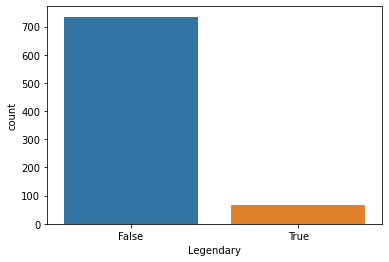

In [15]:
sns.countplot(dataset["Legendary"])

Podemos observar que de las 800 entradas, únicamente unas 100 son legendarios. ¿Esto es importante decirlo? Sí, y detectarlo. Porque una distribución tan dispar entre los casos a predecir y los atributos base puede dar a nuestro modelo muchas dificultades para llegar a encontrar y aprender de ejemplos de nuestro dataset que predecir. Veremos como va influyendo esto en adelante.

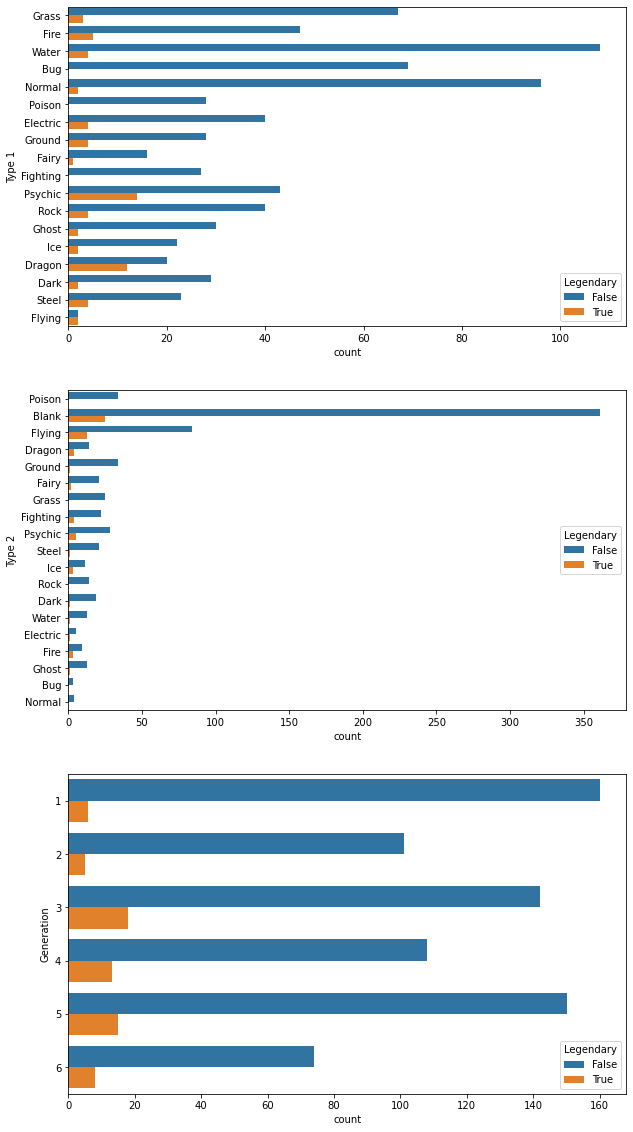

In [16]:
categorical = dataset[["Type 1", "Type 2", "Generation", "Legendary"]]


fig, axes = plt.subplots(3, figsize=(10,20))
# a = 0
b = 0
for col in categorical.columns:
    if col == "Legendary":
        break
    sns.countplot(y = categorical[col], hue= "Legendary", data = dataset, ax = axes[b])
    b+=1


Por el contrario y pese a que la suma de legendarios respecto a los no legendarios es de 1 a 8, en cuanto a los legendarios por tipos está, hasta cierto punto, equilibrado. Hay algunos tipos como pueden ser el tipo lucha o el tipo veneno que no cuentan con un representante de su tipo legendario. Pero, como los otros tampoco tienen muchísimos que digamos, y en general está bien repartido, tampoco es un gran escándalo.

Respecto a las generaciones podemos decir lo mismo, hay algunos más en la 3ª o en la 4ª, pero por lo general está muy bien repartido entre todas.

<AxesSubplot:xlabel='Total', ylabel='Attack'>

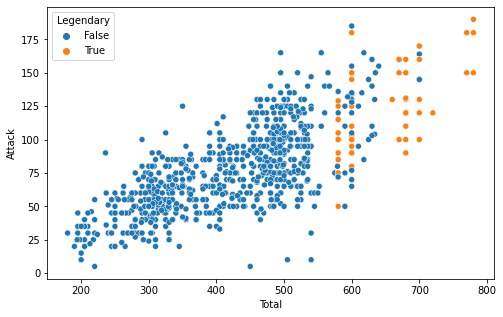

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total", y="Attack", hue="Legendary", data=dataset)

In [18]:
#Convertimos los categóricos a numéricos para que nos sea más cómodo
le = LabelEncoder()
dataset["Type 1"] = le.fit_transform(dataset["Type 1"])
dataset["Type 2"] = le.fit_transform(dataset["Type 2"])
dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,14,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,14,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,14,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,9,14,625,80,100,123,122,120,80,1,False
4,4,Charmander,6,0,309,39,52,43,60,50,65,1,False


Transformamos los atributos categóricos a una representación numérica con el objetivo de trabajar mejor con estos.

<AxesSubplot:>

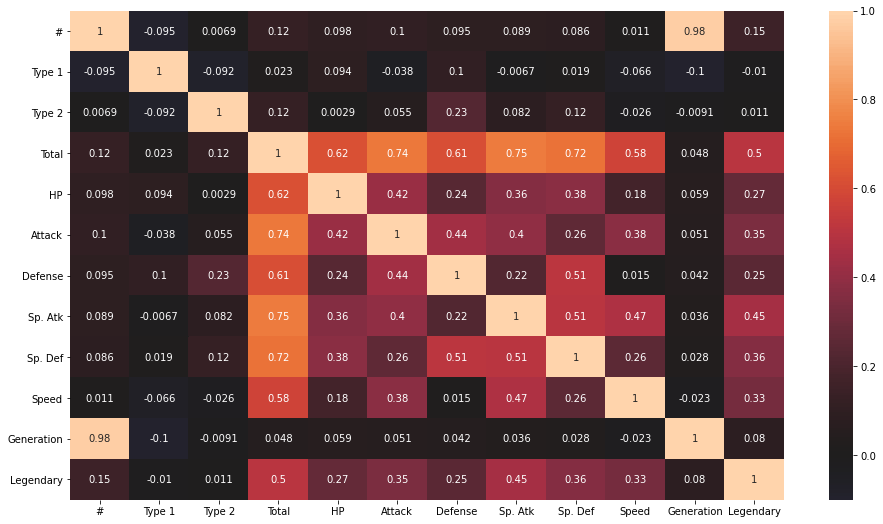

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(dataset.corr(), annot = True, center=0)
#tornar a executar

En cuanto a las correlaciones podemos observar como la más notoria correlación es la generación a la que pertenece el Pokémon respecto a su índice. Esto es completamente normal, pues la creación de los diferentes Pokémon a lo largo de los años ha implicado que se vayan colocando uno tras otro como la lista que son. Es por ese motivo que la generación y el índice tienen tanta correlación, porque literalmente es una sucesión de generaciones e índices.

En segundo lugar, y pese a que no tiene unas correlaciones tan tan grandes, fijamos nuestra vista en las estadísticas base (ataque, defensa, etc) y el 'Total'. Recordemos que el Total es la suma para cada Pokémon de todas sus estadísticas básicas. Con lo cual es completamente normal que tengan esa relación entre sí pues, a fin de cuentas, una proviene de la otra.

In [20]:
X = dataset.drop(['Name', 'Legendary'], axis = 1)
y = dataset['Legendary']

#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10) 

Nuestra 'X' será igual al legendario y su nombre. Y la 'Y' será si es legendario o no, aquello que queremos predecir.

In [21]:
result = dict()

## 2.1. Modelos.
### 2.1.1. Regresión logística

In [22]:
filename = '../../models/model_logR1.sav'
logR1 = pickle.load(open(filename, 'rb'))
res = logR1.score(X_test, y_test)*100

print(res)

91.25


Hemos obtenido una puntuación de Accuracy de 91.25 con el modelo de Regresión Logística. [Quisiera recordar que la función '.score()' devuelve la media de las Accuracy del modelo.]. Es una Accuracy muy alta, aun así nos fijamos en que nos sale un mensaje abajo de los resultados. Este mensaje dice lo siguiente: Fallo para llegar a la convergencia, número máximo de iteraciones alcanzado. ¿Esto qué significa? Bueno, como ya deberíamos saber todos, la convergencia es ese punto en el que la derivada de la función de coste se vuelve 0 (o extremadamente cercano a 0) y damos por finalizada la búsqueda del menor coste posible. Lo que ocurre es que a cada iteración en busca de este valor 0 de la derivada, al que llamamos convergencia (al ir acercándonos, sino sería divergencia) nos acercamos un poquito más, pero igual nuestro modelo no tiene suficiente con las iteraciones que le hemos dado y necesita más. De forma predeterminada la función de 'LogisticRegression()' de SKlearn establece 100 iteraciones máximas para llegar a la convergencia. Vamos a aumentar estas iteraciones para ver si nuestro modelo puede llegar a mejorar con ello.



In [23]:
filename = '../../models/model_logR2.sav'
logR2 = pickle.load(open(filename, 'rb'))
res = logR2.score(X_test, y_test)*100

print(res)

result["logR2"] = res

95.625


Después de hacer varias pruebas con max_iter = 200, 300, 1000, etc, he llegado a un valor del que "no se queja" de ser demasiado pequeño para llegar a la convergencia. Este valor es 1000 iteraciones. Puede llegar a ser un valor demasiado grande para otras bases de datos o modelos, pero dado que el tiempo que tarda en realizar las 1000 iteraciones no es tan significativo respecto a cómo era originalmente con 100, no he visto por qué no establecer este valor. 

Observamos que al haberle "dado más cancha" a nuestro modelo, ahora ha podido llegar hasta la convergencia y ha llegado a obtener una Accuracy de 95.625, lo cual puede parecer que no es un gran cambio; Pero considerando que simplemente hemos ampliado el número de iteraciones, el resultado es muchísimo más grande de lo que era originalmente con únicamente 100 iteraciones. Hay un 4% de los casos en los que no errará nuestro modelo, lo cual es una gran noticia. 

### 2.1.2. Regresión Logística con procesamiento

En esta ocasión usaremos un transformador de columnas y una *pipeline*. Estas clases forman parte de SKlearn y tienen el objetivo de autoprocesar y modelar los datos de forma autónoma. Este trabajo lo podríamos realizar nosotros también pero usaremos las clases que nos da SKlearn para facilitarnos el trabajo.

Todo esto lo realizamos con el objetivo de mejorar nuestro modelo anterior. Habíamos conseguido una Accuracy del 95.625%, pero vamos a ver cómo al implementar estas funciones mejoramos estos datos.

In [24]:
col_trans = make_column_transformer(
            (OneHotEncoder(),['Type 1', 'Type 2', 'Generation']),
            (StandardScaler(),['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']), #Escalamos datos numéricos
            remainder = 'passthrough') #Para las demás columnas no haremos nada

In [25]:
filename = '../../models/model_RLproc.sav'
RLproc = pickle.load(open(filename, 'rb'))
res = RLproc.score(X_test, y_test)*100

print(res)

result["logR(P)"] = res

96.25


Observamos que con el procesamiento realizado hemos obtenido un 96.25% de Accuracy, este valor es más elevado que nuestro mejor resultado hasta la fecha de 95.625%. No es un cambio muy grande, pero desde luego es un pequeño paso que no nos ha costado nada y que nos ha dado casi un 1% más de Accuracy.

### 2.1.3. SVM

In [26]:
filename = '../../models/model_svm.sav'
svm = pickle.load(open(filename, 'rb'))
res = svm.score(X_test, y_test)*100

print(res)

result["SVM"] = res

91.875


Después de realizar muchas pruebas, SVM con un 91.875% obtiene un 5% aproximadamente de menos Accuracy que nuestro mejor dato. Ni siquiera el tiempo que tarda (que tampoco es muy elevado) justifica su uso para este problema.

### 2.1.4. Random Forest

In [27]:
#Por alguna razón el load model no acaba de funcionar con el random forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state=10)
pipe = make_pipeline(col_trans, rf)
pipe.fit(X_train, y_train)
res = pipe.score(X_test, y_test)*100

print(res)

result["RF"] = res

95.625


Aquí encontramos una sorpresa. Pues si bien Random Forest nos da mejores resultados respecto a SVM, y la Regresión Logística original de 100 iteraciones; en el caso de la Regresión Logística con 1000 iteraciones se iguala la Accuracy. Y ya no solo eso, sino que con el procesamiento de datos, hay casi un 1% de Accuracy que perdemos respecto a la RL con procesamiento.

Indicar que en este Random Forest **también** hemos aplicado procesamiento, así como en el SVM. Con lo cual no hay mucha opción de mejoría.

### 2.1.5.  Gradient Boosting

#### 2.1.6. GB y búsqueda de los mejores parámetros

In [28]:
#Con Learning rate en 1.1
filename = '../../models/model_gb1.sav'
gb1 = pickle.load(open(filename, 'rb'))
res = gb1.score(X_test, y_test)*100

print(res)

86.875


In [29]:
#Con n_estimators en 200.
filename = '../../models/model_gb2.sav'
gb2 = pickle.load(open(filename, 'rb'))
res = gb2.score(X_test, y_test)*100

print(res)

96.875


Ahora mismo, y con estos valores, Gradient Boosting ya ha superado a nuestro mejor modelo hasta el momento, que era la Regresión Lineal con procesamiento de datos. Aquí también los hemos procesado. Y obtenemos una Accuracy de 96.875% frente a la 96.25% de la RL + procesamiento. 

Estos resultados son muy buenos, seguiremos buscando aún mejores resultados si cabe.

In [30]:
#Mejores resultados posibles
filename = '../../models/model_gb3.sav'
gb3 = pickle.load(open(filename, 'rb'))
res = gb3.score(X_test, y_test)*100

print(res)

result["GB"] = res

98.75


Aquí Gradient Boosting, con un 98.75% de Accuracy es el que prodíamos nombrar como la **Joya de la corona**. Gradient Boosting es simplemente excelente. 

Después de hacer muchísimas pruebas tocando diferentes parámetros, llego a la conclusión de que GB es MUY sensible a ellos. El mínimo cambio en, por ejemplo, cambiar el 'learning_rate' añadiéndole 0.000001 de más, supone perder un 1% en la Acuracy total. Y estos son, después de hacer muchas pruebas y modificarlos mucho, sencillamente los mejores parámetros que he logrado encontrar. 

***

# 3. Análisis de resultados.

Una vez hemos realizado todos nuestros modelos, veremos los resultados obtenidos para ver, de forma más visual, qué modelos han sido mejores y en qué mejoría.

In [31]:
list(result.values())

[95.625, 96.25, 91.875, 95.625, 98.75]

Text(0.5, 1.0, 'Prediction Result')

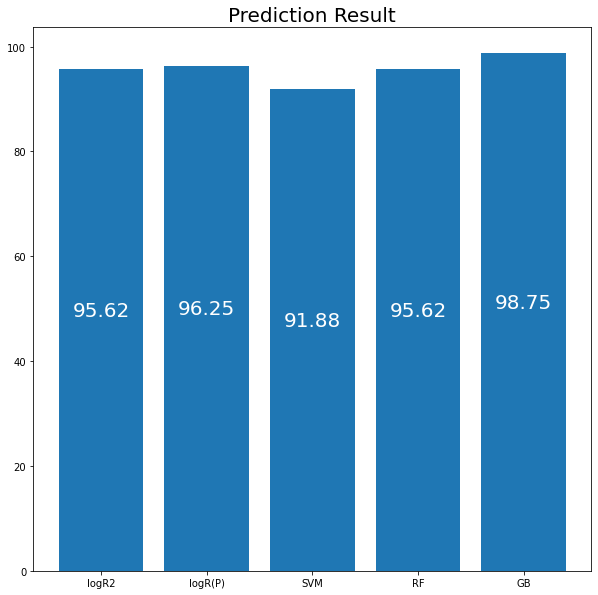

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = plt.bar(result.keys(), result.values())

def autolabel(rects):
    x = 0
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                round(list(result.values())[x], 2),
                ha='center', va='bottom', rotation=0, size=20, color="white")
        x+=1

autolabel(bar_plot)
ax.set_title("Prediction Result", size=20)

Con un 98.75% de Accuracy total, Gradient Boosting se sitúa en la cabeza de todos los modelos con los que he trabajado en este proyecto. Esta Accuracy es una absoluta (y perdonadme por el término) *burrada*. Es prácticamente infalible. Únicamente un 1.25% de las veces fallará, lo cual es excelente.

Si bien habíamos encontrado un muy buen modelo, como era el de LR(P), Gradient Boosting lo supera con creces. Obteniendo un 98.75 frente al 96.25 del primero. 

Nos quedamos, definitivamente con Gradient Boosting con los siguientes parámetros:
- learning_rate=0.9
- n_estimators = 100
- validation_fraction = 0.2
- n_iter_no_change=100
- random_state=10 (no es un parámetro como tal pero hay que ponerlo para mantener la coherencia con las demás pruebas)
